# Load Tidy csv Files to DataFrames 

In this workbook we:
1. Reload the cleaned data to DataFrames
2. Perform EDA(Exploraory Data Analysis) to Answer Questions about the business problem
3. Summarize the EDA


## Reload Cleaned data

In [256]:
import pandas as pd
import numpy as nm
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [6]:
#helper to list all csv or type files in a dir
def find_csv_filenames( path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#creates dataframes for type specified
def create_dfs(path, filelist, suffix=".csv"):
    #Read all the files and store in a dataFrame
    # the data Frames for each file will be listed in a dict 
    # where key is the name and value is the df
    dict_csv_files = {}

    for filename in csvfiles:
        filename_cleaned = filename.replace("_tidy.csv", "").replace(".","_")#cleaning
        filename_df = pd.read_csv(path + filename, index_col = 0, encoding='utf8')
        dict_csv_files[filename_cleaned] = filename_df
    return dict_csv_files    

#dicts of dfname and df
def create_df_dict(namelist,dflist):
    dict_df_names = dict(zip(namelist, dflist))
    return dict_df_names 

#takes a dict and saves all to csvs per savepath
def save_dict_tocsv(savepath, dict_dfs, suffix):
    for key,value in dict_dfs.items():
        value.to_csv(path_or_buf = savepath 
                     + key +'_tidy' + suffix, encoding='utf8')

In [7]:
#Create csvfiles, tsvfiles and call createdfs dict
path = '../data/'
csvfiles = find_csv_filenames(path)
dict_dfs = create_dfs(path, csvfiles, suffix=".csv" )

In [11]:
dict_dfs.keys()

dict_keys(['df_bom', 'df_imdbbasics', 'df_imdb_akas', 'df_imdb_crew', 'df_imdb_name', 'df_imdb_principals', 'df_imdb_ratings', 'df_tmb', 'df_tn_movie_budget'])

In [12]:
##Create Working DataFrames
df_bom = dict_dfs['df_bom']
df_imdbbasics = dict_dfs['df_imdbbasics'] 
df_imdb_akas = dict_dfs['df_imdb_akas']       
df_imdb_name = dict_dfs['df_imdb_name']    
df_imdb_crew = dict_dfs['df_imdb_crew']     
df_imdb_principals = dict_dfs['df_imdb_principals']     
df_imdb_ratings = dict_dfs['df_imdb_ratings']         
df_tmb = dict_dfs['df_tmb']                        
df_tn_movie_budget = dict_dfs['df_tn_movie_budget']


## Data Exploration<br>
In the EDA (Exploratory Data Analysis) phase, we will work to answer the following question about the business problem by visually answering the data.  Our business problem is to deliver actionable insights about the movie industry, specifically types of movies.  I approached this Business Problem as defining a movie studio business strategy which leads me to these<br>



__Questions:__
1. What is success for a feature film? This educates and defines expectations
2. At what level of production budget will we be comfortable investing?
3. What types of feature films genres are we going to make?
4. When should we most optimally release our movies? Are there better months for our releases?
5. How many feature films should we release per year? ie drives initial investment
6. Who in the industry would be good to work with as producers and directors?
7. Any correlation to MPA Rating?
7. Other factors to consider.

### What is success for a feature film?
To answer this we should look to analyse data for movies we might consider making.

In industry terms there are four types of production level movies.
1. High Budget: Production budget(PB) is greater than 80 Million US Dollars
2. Medium Budget: PB is between 2 to 80 Million USD
3. Low Bugdet: PB is between 10K and 2 Million USD
4. Micro Budget: PB is under 10K
  

As a first run in the movie business Microscoft would not want to take a chance on high budget features so we will look at returns in the Medium budget.  The average PB(production budget) is right around $65 Million.  We will start with that as our cap.
Best Return on Investment of Medium budget movies

Lets look at the df_tn_movie_budget data focusing at worldwide gross.

In [21]:
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
 5   profit_over_pb     5782 non-null   float64
 6   roi_percent        5782 non-null   float64
dtypes: float64(5), object(2)
memory usage: 361.4+ KB


Lets create a feature for difference between worldwide gross and prod budget <br>
Business terms: Profit = Returned - Investment <br>
Our Data: profit_over_pb = worldwide_gross - production_budget<br>

Let's Calculate percent returned for movies with budgets below $65Mill <br>
Business terms: ROI = Profit / Cost of the investment * 100 <br>
Our Data: roi_percent= profit_over_pb / production_budget *100

In [17]:
df_tn_movie_budget['profit_over_pb'] = df_tn_movie_budget['worldwide_gross'] - \
df_tn_movie_budget['production_budget']

In [18]:
df_tn_movie_budget['roi_percent'] = round((df_tn_movie_budget['profit_over_pb'] / \
df_tn_movie_budget['production_budget'])*100,1)#round to 1 digit

In [20]:
#Sort on roi_percent
df_tn_movie_budget.sort_values(by='roi_percent',ascending = False).head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,44975000.0,179900.0
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,99550000.0,49775.0
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8


Lets filter to look at movies where budget is less than=$65 mill

In [22]:
df_budget_sub65m = df_tn_movie_budget[df_tn_movie_budget['production_budget'] \
                   <= 65000000.0].sort_values(by='roi_percent', ascending = False)

In [23]:
df_budget_sub65m.info()#Note 5012 movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 46 to 63
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5012 non-null   object 
 1   movie              5012 non-null   object 
 2   production_budget  5012 non-null   float64
 3   domestic_gross     5012 non-null   float64
 4   worldwide_gross    5012 non-null   float64
 5   profit_over_pb     5012 non-null   float64
 6   roi_percent        5012 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.2+ KB


In [24]:
df_budget_sub65m.reset_index(inplace =True) 

In [25]:
#filer movies greater than 2 Mil
df_budg_2to65mil = df_budget_sub65m[df_budget_sub65m['production_budget'] \
                   >= 2000000.0].sort_values(by='roi_percent', ascending = False)

In [26]:
df_budg_2to65mil.info()#note 4231 movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 28 to 5010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4231 non-null   int64  
 1   release_date       4231 non-null   object 
 2   movie              4231 non-null   object 
 3   production_budget  4231 non-null   float64
 4   domestic_gross     4231 non-null   float64
 5   worldwide_gross    4231 non-null   float64
 6   profit_over_pb     4231 non-null   float64
 7   roi_percent        4231 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 297.5+ KB


In [27]:
df_budg_2to65mil.reset_index(inplace =True) 

Lets create a easy human readable feature called __x_times_invest__.<br>This is equal to our worldwide_gross / PB where as ROI percent is the profit / PB * 100.

In [28]:
df_budg_2to65mil['x_times_invest'] = round(df_budg_2to65mil['worldwide_gross']/df_budg_2to65mil['production_budget'],1)

In [29]:
df_budg_2to65mil.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,28,68,"Dec 15, 1939",Gone with the Wind,3900000.0,198680470.0,390525192.0,386625192.0,9913.5,100.1
1,31,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,260691415.0,8989.4,90.9
2,36,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000.0,435110554.0,792965326.0,782465326.0,7452.1,75.5
3,37,48,"Apr 19, 2002",My Big Fat Greek Wedding,5000000.0,241438208.0,374890034.0,369890034.0,7397.8,75.0
4,38,90,"Aug 13, 1997",The Full Monty,3500000.0,45950122.0,261249383.0,257749383.0,7364.3,74.6
5,39,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,786598007.0,775598007.0,7050.9,71.5
6,45,13,"Jun 16, 1978",Grease,6000000.0,181813770.0,387510179.0,381510179.0,6358.5,64.6
7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
9,56,25,"Mar 9, 1994",Four Weddings and a Funeral,4500000.0,52700832.0,242895809.0,238395809.0,5297.7,54.0


It makes sense to only focus on recent movies.  Lets look at the movies from 2010 onward.

In [30]:
df_budg_2to65mil_11yr = df_budg_2to65mil[pd.to_datetime(df_budg_2to65mil['release_date']).dt.year >= 2010]

In [31]:
df_budg_2to65mil_11yr.reset_index(inplace =True) 

In [191]:
df_budg_2to65mil_11yr.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.485000e+03,1.485000e+03,1485.000000,1485.000000
mean,2207.599327,2542.965657,51.546128,2.082116e+07,2.718077e+07,5.767083e+07,3.684966e+07,200.663569,3.004377
std,1280.861844,1423.621413,28.217390,1.654820e+07,3.899086e+07,8.573114e+07,7.879218e+07,502.658395,5.027945
min,7.000000,52.000000,1.000000,2.000000e+06,0.000000e+00,0.000000e+00,-6.448372e+07,-100.000000,0.000000
25%,1132.000000,1369.000000,28.000000,7.000000e+06,3.100070e+05,3.721988e+06,-4.412809e+06,-67.800000,0.300000
50%,2142.000000,2439.000000,52.000000,1.600000e+07,1.254598e+07,2.638704e+07,9.867665e+06,61.500000,1.600000
75%,3415.000000,3822.000000,76.000000,3.000000e+07,3.912359e+07,7.634739e+07,4.940194e+07,246.200000,3.500000
max,4230.000000,5010.000000,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


#### What is our target?  
Based on industry research, movies dont truly turn a profit until the 2.0 to 2.5 times PB mark due to marketing and distributors. <br>
__Note:__ The median value of medium budget movies (2-65mil) is 61.5% ROI or 1.6 x the investment.<br>
 Lets set our target and define success as movies with 150% ROI_percent or wwgross 2.5 times the investment.<br>
 __Example:__PB is 5000000, __2.5__ times is 12,500,000 for worldwide_gross<br>   Profit would be 7500000  ROI%=7500000 /5000000 *100 =__150%__

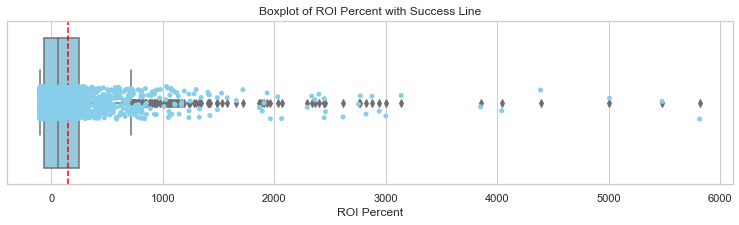

In [221]:
#Insert graph of all movies roi with red line at 2.5x or 150% roi

sns.set(style="whitegrid") 
fig, ax1 = plt.subplots(figsize=(13,3),sharex=True ,sharey=True)

boxplot = sns.boxplot(ax=ax1, x=df_budg_2to65mil_11yr["roi_percent"],color='skyblue')
sns.stripplot(ax=ax1, x=df_budg_2to65mil_11yr["roi_percent"],color='skyblue')
ax1.set(xlabel = 'ROI Percent', title='Boxplot of ROI Percent with Success Line')
ax1.axvline(150, ls='--',color='red',label='Success Line')


plt.show();

__Note:__ How many movies with roi_percent at >=150% only 533 from 1485. Only 35% were successful.  65% fail.

In [193]:
#lets only analyze the movies with >=150% ROI(533 movies)
df_budg_success_11yrs = df_budg_2to65mil_11yr[df_budg_2to65mil_11yr['roi_percent'] >= 150]

533 successful movies
INSERT graph of top 10

In [196]:
df_budg_success_11yrs.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
1,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1
3,18,"May 25, 2012",Les Intouchables,10800000.0,13182281.0,484873045.0,474073045.0,4389.6,44.9
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5
6,53,"Sep 13, 2013",Insidious Chapter 2,5000000.0,83586447.0,161921515.0,156921515.0,3138.4,32.4
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0
8,67,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4
9,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8


In [195]:
df_budg_success_11yrs = df_budg_success_11yrs.drop(columns=['level_0','index'])


In [226]:
df_budg_success_11yrs.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,533.000000,5.330000e+02,5.330000e+02,5.330000e+02,5.330000e+02,533.000000,533.000000
mean,55.587242,2.263056e+07,5.674026e+07,1.231468e+08,1.005162e+08,586.596998,6.863227
std,29.401908,1.712939e+07,4.938324e+07,1.112654e+08,1.014964e+08,678.787104,6.790683
min,1.000000,2.000000e+06,0.000000e+00,5.941994e+06,3.941994e+06,150.000000,2.500000
25%,33.000000,8.500000e+06,2.150269e+07,4.701145e+07,3.678539e+07,227.800000,3.300000
50%,59.000000,1.800000e+07,4.629074e+07,9.405095e+07,7.049704e+07,364.000000,4.600000
75%,82.000000,3.500000e+07,7.546858e+07,1.625028e+08,1.292782e+08,679.200000,7.800000
max,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


In [222]:
#save successful movies to file
df_budg_success_11yrs.to_csv(path_or_buf = path + 'budg_success_11yrs')

<AxesSubplot:xlabel='production_budget', ylabel='roi_percent'>

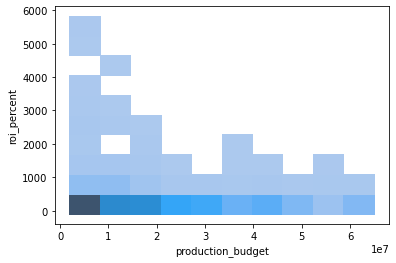

In [991]:
#df_budget_2to65mil_21yr['roi'].hist(bins=11, by='production_budget')
sns.histplot(y=df_budg_2to65mil_11yr['roi_percent'], x=df_budg_2to65mil_11yr['production_budget'],stat="count",bins=10
            )

<AxesSubplot:ylabel='production_budget'>

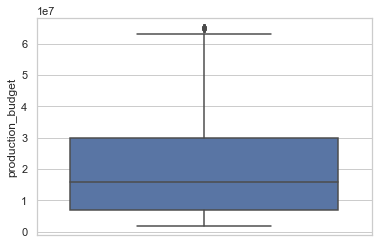

In [224]:
sns.boxplot(y=df_budg_2to65mil_11yr['production_budget'])

__Conclusion:__ The Percent RoI for movies in the medium budget range from 2 - 65 M USD has a mean of 586% return but median is 61.5%. The mean is skewed due to the number of outliers.  Most movies do not succeed.  In this data, __65%__ do not succeed.  Considering marketing and distribution, A successful movie should return at least 2.5 times the production budget, ie 150% Roi.  Going forward we will only look at those movies. 

### At what level of production budget will we be comfortable investing?

Of the 533 Successful Films in medium budget range since 2010, lets look into the production budgets of those.


In [235]:
df_budg_success_11yrs.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,533.000000,5.330000e+02,5.330000e+02,5.330000e+02,5.330000e+02,533.000000,533.000000
mean,55.587242,2.263056e+07,5.674026e+07,1.231468e+08,1.005162e+08,586.596998,6.863227
std,29.401908,1.712939e+07,4.938324e+07,1.112654e+08,1.014964e+08,678.787104,6.790683
min,1.000000,2.000000e+06,0.000000e+00,5.941994e+06,3.941994e+06,150.000000,2.500000
25%,33.000000,8.500000e+06,2.150269e+07,4.701145e+07,3.678539e+07,227.800000,3.300000
50%,59.000000,1.800000e+07,4.629074e+07,9.405095e+07,7.049704e+07,364.000000,4.600000
75%,82.000000,3.500000e+07,7.546858e+07,1.625028e+08,1.292782e+08,679.200000,7.800000
max,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


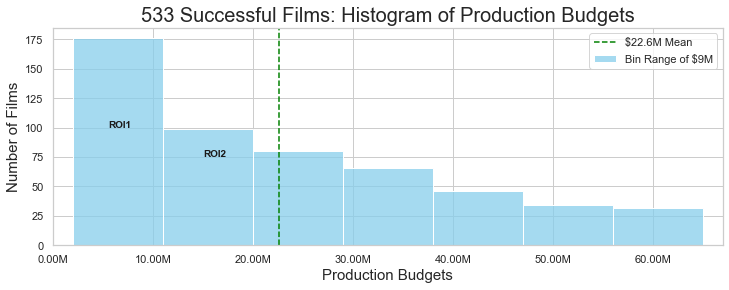

In [357]:
#Histogram of Procudtion budget bins

sns.set(style="whitegrid") 
fig, ax1 = plt.subplots(figsize=(12,4),sharex=True ,sharey=True)

histplot = sns.histplot(ax=ax1, x=df_budg_success_11yrs["production_budget"],
                        color='skyblue',bins=7,label='Bin Range of $9M')

ax1.set_xlabel('Production Budgets', fontsize=15)
ax1.set_ylabel('Number of Films', fontsize=15)
ax1.set_title('533 Successful Films: Histogram of Production Budgets',fontsize=20)
#Set the Average Line
ax1.axvline(df_budg_success_11yrs["production_budget"].mean(), ls='--',
            color='green',label='$22.6M Mean')
ax1.set(xlim = (0,67000000))
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax1.get_xticks().tolist()
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])


ax1.text(x=5500000,y=100,s='ROI1',
            size='small',
            color='k',
            weight='semibold')

ax1.text(x=15000000,y=75,s='ROI2',
            size='small',
            color='k',
            weight='semibold')


ax1.set(xlim = (0,67000000))
ax1.legend(loc='upper right')
plt.show();

__Conclusion:__ Most of the movies are in the 2M to 11M and 11M to 20M bin ranges with a steady decline as budgets increase.  We do not need to spend a high amount on budget to make a successful film.
    We need to look at _genres_ of the movies to determine more.  Looking at the Average ROI per range would also be informative.

### Question: What types of feature film genres should we make?
Lets pull in genre information for the movies.  This has been noted in the df_imdbbasics.  We will join this with out budget data.




In [310]:
df_imdbbasics.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [994]:
df_budg_success_11yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 533 non-null    int64  
 1   release_date       533 non-null    object 
 2   movie              533 non-null    object 
 3   production_budget  533 non-null    float64
 4   domestic_gross     533 non-null    float64
 5   worldwide_gross    533 non-null    float64
 6   profit_over_pb     533 non-null    float64
 7   roi_percent        533 non-null    float64
 8   x_times_invest     533 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.6+ KB


In [328]:
#We will do a left join on the successful movies and the imdb basics 
#keying on movie name and year of release
df_budget_genres = pd.merge(df_budg_success_11yrs, df_imdbbasics, 
                            left_on=  ['movie',
                                       pd.to_datetime(df_budg_success_11yrs['release_date']).dt.year],
                            right_on= ['primary_title','start_year'], 
                            how = 'left')

In [329]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 544 non-null    int64  
 1   release_date       544 non-null    object 
 2   movie              544 non-null    object 
 3   production_budget  544 non-null    float64
 4   domestic_gross     544 non-null    float64
 5   worldwide_gross    544 non-null    float64
 6   profit_over_pb     544 non-null    float64
 7   roi_percent        544 non-null    float64
 8   x_times_invest     544 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         544 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 63.8+ KB


In [330]:
#We have to exclude where the genres were unknown or Nan
df_budget_genres = df_budget_genres[df_budget_genres.genres != 'unknown']

In [331]:
df_budget_genres = df_budget_genres[df_budget_genres.primary_title.notna()]

In [332]:
#We have matching genre info for 428 successful movies
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 428 non-null    int64  
 1   release_date       428 non-null    object 
 2   movie              428 non-null    object 
 3   production_budget  428 non-null    float64
 4   domestic_gross     428 non-null    float64
 5   worldwide_gross    428 non-null    float64
 6   profit_over_pb     428 non-null    float64
 7   roi_percent        428 non-null    float64
 8   x_times_invest     428 non-null    float64
 9   primary_title      428 non-null    object 
 10  original_title     428 non-null    object 
 11  start_year         428 non-null    int64  
 12  runtime_minutes    428 non-null    float64
 13  genres             428 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 50.2+ KB


In [333]:
#Onlyrun this code once or the genre lis will be in a list itself
#genres is a list of upto 3 genres, splitting it to get the individual genres
df_budget_genres['genres'] = df_budget_genres['genres'].astype(str).apply(lambda x: x.split(",") if x else x)
df_budget_genres.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,original_title,start_year,runtime_minutes,genres
530,1,"Feb 18, 2011","Big Mommas: Like Father, Like Son",32000000.0,37915414.0,82332450.0,50332450.0,157.3,2.6,"Big Mommas: Like Father, Like Son","Big Mommas: Like Father, Like Son",2011,107.0,"[Action, Comedy, Crime]"
532,66,"Dec 19, 2012",Zero Dark Thirty,52500000.0,95720716.0,134612435.0,82112435.0,156.4,2.6,Zero Dark Thirty,Zero Dark Thirty,2012,157.0,"[Drama, Thriller]"
535,62,"Jan 12, 2018",The Commuter,40000000.0,36343858.0,101985431.0,61985431.0,155.0,2.5,The Commuter,The Commuter,2018,105.0,"[Action, Mystery, Thriller]"
536,77,"Sep 21, 2012",The Perks of Being a Wallflower,13000000.0,17742948.0,33069303.0,20069303.0,154.4,2.5,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,[Drama]
537,6,"Oct 24, 2014",John Wick,30000000.0,43037835.0,76235001.0,46235001.0,154.1,2.5,John Wick,John Wick,2014,101.0,"[Action, Crime, Thriller]"
539,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,The Adjustment Bureau,2011,106.0,"[Romance, Sci-Fi, Thriller]"
540,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,Paul,2011,104.0,"[Adventure, Comedy, Sci-Fi]"
541,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,Unbroken,2014,137.0,"[Biography, Drama, Sport]"
542,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,Another Year,2010,129.0,"[Comedy, Drama]"
543,81,"Nov 11, 2016",Almost Christmas,17000000.0,42065185.0,42493506.0,25493506.0,150.0,2.5,Almost Christmas,Almost Christmas,2016,111.0,"[Comedy, Drama]"


In [334]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 428 non-null    int64  
 1   release_date       428 non-null    object 
 2   movie              428 non-null    object 
 3   production_budget  428 non-null    float64
 4   domestic_gross     428 non-null    float64
 5   worldwide_gross    428 non-null    float64
 6   profit_over_pb     428 non-null    float64
 7   roi_percent        428 non-null    float64
 8   x_times_invest     428 non-null    float64
 9   primary_title      428 non-null    object 
 10  original_title     428 non-null    object 
 11  start_year         428 non-null    int64  
 12  runtime_minutes    428 non-null    float64
 13  genres             428 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 50.2+ KB


In [335]:
#a set of distinct genres in the df
all_genres = set()
for genres in df_budget_genres['genres']:
    if genres:
        all_genres.update(genres)

In [337]:
#Listing of all distinct genres 
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [338]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 
#if the film is of that genre.
for genre in all_genres:
    df_budget_genres[genre] = np.zeros(shape=df_budget_genres.shape[0])
                                
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Thriller,Family,Crime,Comedy,Biography,Drama,Documentary,History,War,Musical
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
#setting the genre to be 1 if the film is of that genre
for index, row in df_budget_genres.iterrows():
    if row['genres']:
        for genre in row['genres']:
            df_budget_genres.loc[index, genre] = 1

df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Thriller,Family,Crime,Comedy,Biography,Drama,Documentary,History,War,Musical
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [341]:
len(all_genres)

21

In [340]:
#checking the counts for all different genres
#all_genres
for col in all_genres:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{df_budget_genres[col].value_counts()}')

Viewing values in col: Adventure
Top 5 values:
0.0    384
1.0     44
Name: Adventure, dtype: int64
Viewing values in col: Romance
Top 5 values:
0.0    357
1.0     71
Name: Romance, dtype: int64
Viewing values in col: Action
Top 5 values:
0.0    352
1.0     76
Name: Action, dtype: int64
Viewing values in col: Horror
Top 5 values:
0.0    349
1.0     79
Name: Horror, dtype: int64
Viewing values in col: Mystery
Top 5 values:
0.0    372
1.0     56
Name: Mystery, dtype: int64
Viewing values in col: Sci-Fi
Top 5 values:
0.0    402
1.0     26
Name: Sci-Fi, dtype: int64
Viewing values in col: Music
Top 5 values:
0.0    406
1.0     22
Name: Music, dtype: int64
Viewing values in col: Fantasy
Top 5 values:
0.0    409
1.0     19
Name: Fantasy, dtype: int64
Viewing values in col: Animation
Top 5 values:
0.0    418
1.0     10
Name: Animation, dtype: int64
Viewing values in col: Western
Top 5 values:
0.0    427
1.0      1
Name: Western, dtype: int64
Viewing values in col: Sport
Top 5 values:
0.0    41

In [342]:
#making a list of all genres
cols = list(df_budget_genres.columns)

In [348]:
genre_cols = cols[14:]

In [349]:
#getting a dict with genre counts
genre_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [350]:
genre_count

{'Adventure': 44,
 'Romance': 71,
 'Action': 76,
 'Horror': 79,
 'Mystery': 56,
 'Sci-Fi': 26,
 'Music': 22,
 'Fantasy': 19,
 'Animation': 10,
 'Western': 1,
 'Sport': 10,
 'Thriller': 96,
 'Family': 16,
 'Crime': 62,
 'Comedy': 164,
 'Biography': 52,
 'Drama': 228,
 'Documentary': 12,
 'History': 13,
 'War': 2,
 'Musical': 1}

In [352]:
keys = list(genre_count.keys())
values = list(genre_count.values())

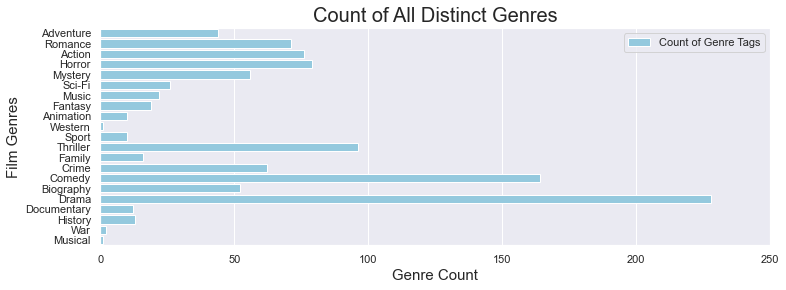

In [354]:
#Histogram of Procudtion budget bins

sns.set(style="darkgrid") 
fig, ax1 = plt.subplots(figsize=(12,4),sharex=True ,sharey=True)

histplot = sns.barplot(y = keys, x = values, color = 'skyblue',
                       label='Count of Genre Tags')

ax1.set_xlabel('Genre Count', fontsize=15)
ax1.set_ylabel('Film Genres', fontsize=15)
ax1.set_title('Count of All Distinct Genres',fontsize=20)
#Set the Average Line

ax1.set(xlim = (0,250))

ax1.legend(loc='upper right')
plt.show();




The 6 most popular genres are Drama, Comedy, Thriller, Horror, Action and Romance.

Grouping by genres to look at sum, mean and max related to worldwide gross 
and roi_percent.

In [358]:
#Total Gross by Genre
ww_gross = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).sum()
    ww_gross[genre] = grouped.iloc[1]['worldwide_gross']

In [359]:
#Average Gross by Genre
ww_gross_avg = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    ww_gross_avg[genre] = grouped.iloc[1]['worldwide_gross']

In [400]:
#Max Roi% by Genre
max_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).max()
    max_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [399]:
#Average Roi% by Genre
avg_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [362]:
#Average Prod Budget by Genre
avg_prod_budget = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_prod_budget[genre] = grouped.iloc[1]['production_budget']

In [426]:
#Min Prod Budget by Genre
min_prod_budget = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).min()
    min_prod_budget[genre] = grouped.iloc[1]['production_budget']

In [377]:
ww_gross_avg

{'Adventure': 162563478.88636363,
 'Romance': 120397643.92957747,
 'Action': 166454629.31578946,
 'Horror': 109805546.06329113,
 'Mystery': 121582196.875,
 'Sci-Fi': 149113348.15384614,
 'Music': 145486606.3181818,
 'Fantasy': 103467528.4736842,
 'Animation': 238795442.3,
 'Western': 252276928.0,
 'Sport': 106054711.0,
 'Thriller': 138370908.53125,
 'Family': 117984713.4375,
 'Crime': 122348923.75806452,
 'Comedy': 123180125.51829268,
 'Biography': 147391950.3653846,
 'Drama': 116104601.25438596,
 'Documentary': 61298916.916666664,
 'History': 152316510.76923078,
 'War': 109060110.0,
 'Musical': 50827466.0}

In [378]:
ww_gross

{'Adventure': 7152793071.0,
 'Romance': 8548232719.0,
 'Action': 12650551828.0,
 'Horror': 8674638139.0,
 'Mystery': 6808603025.0,
 'Sci-Fi': 3876947052.0,
 'Music': 3200705339.0,
 'Fantasy': 1965883041.0,
 'Animation': 2387954423.0,
 'Western': 252276928.0,
 'Sport': 1060547110.0,
 'Thriller': 13283607219.0,
 'Family': 1887755415.0,
 'Crime': 7585633273.0,
 'Comedy': 20201540585.0,
 'Biography': 7664381419.0,
 'Drama': 26471849086.0,
 'Documentary': 735587003.0,
 'History': 1980114640.0,
 'War': 218120220.0,
 'Musical': 50827466.0}

In [401]:
max_roi_genre

{'Adventure': 1281.1,
 'Romance': 2617.9,
 'Action': 3001.6,
 'Horror': 5817.1,
 'Mystery': 5007.4,
 'Sci-Fi': 1867.8,
 'Music': 2031.8,
 'Fantasy': 2296.9,
 'Animation': 710.9,
 'Western': 620.8,
 'Sport': 1075.1,
 'Thriller': 5007.4,
 'Family': 1423.0,
 'Crime': 1234.9,
 'Comedy': 2617.9,
 'Biography': 3001.6,
 'Drama': 3001.6,
 'Documentary': 2876.1,
 'History': 827.1,
 'War': 468.1,
 'Musical': 512.4}

In [402]:
avg_roi_genre

{'Adventure': 375.74090909090904,
 'Romance': 515.9394366197183,
 'Action': 441.0249999999998,
 'Horror': 1035.9037974683538,
 'Mystery': 1009.175,
 'Sci-Fi': 603.6384615384616,
 'Music': 549.4454545454547,
 'Fantasy': 598.884210526316,
 'Animation': 412.9200000000001,
 'Western': 620.8,
 'Sport': 361.71,
 'Thriller': 821.5989583333327,
 'Family': 420.64375,
 'Crime': 336.148387096774,
 'Comedy': 458.09085365853673,
 'Biography': 549.0634615384616,
 'Drama': 554.131140350877,
 'Documentary': 625.5666666666666,
 'History': 436.8076923076923,
 'War': 384.3,
 'Musical': 512.4}

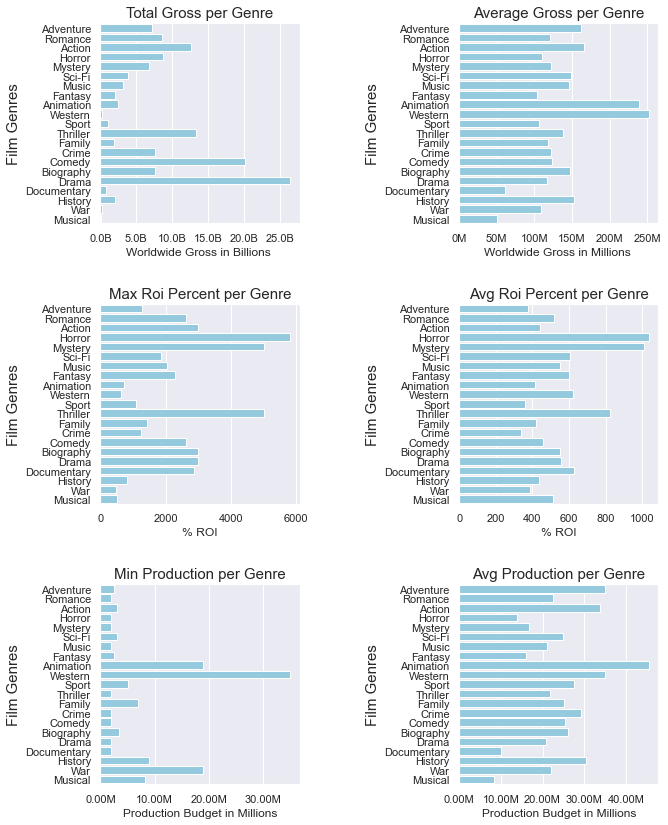

In [428]:
#Genre Grid 
#This graph of subplots could be refactored to a function and could be reused 
sns.set(style="darkgrid") 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(figsize=(10,14),
                                                 nrows=3,ncols=2, )

df_items1 = pd.DataFrame(ww_gross.items())
barplot = sns.barplot(data=df_items1, x=1, y=0,ax=ax1, color = 'skyblue',)
ax1.set(xlabel = 'Worldwide Gross in Billions ',
        ylabel='Genre', title='Total Gross per Genre');
ax1.set_ylabel('Film Genres', fontsize=15)
ax1.set_title('Total Gross per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax1.get_xticks().tolist()
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_xticklabels(['{:,.1f}'.format(x/1000000000) + 'B' for x in ticks_loc])


df_items2 = pd.DataFrame(ww_gross_avg.items())
ax2 = sns.barplot(data=df_items2, x=1, y=0,ax=ax2,color = 'skyblue')
ax2.set(xlabel = 'Worldwide Gross in Millions ', ylabel='Genre',
        title='Average Gross per Genre');

ax2.set_ylabel('Film Genres', fontsize=15)
ax2.set_title('Average Gross per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax2.get_xticks().tolist()
ax2.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax2.set_xticklabels(['{:,.0f}'.format(x/1000000) + 'M' for x in ticks_loc])


df_items3 = pd.DataFrame(max_roi_genre.items())
ax3 = sns.barplot(data=df_items3, x=1, y=0, ax=ax3,color = 'skyblue')
ax3.set(xlabel = '% ROI', ylabel='Film Genre', title='Max Roi Percent per Genre');
ax3.set_ylabel('Film Genres', fontsize=15)
ax3.set_title('Max Roi Percent per Genre',fontsize=15)

df_items4 = pd.DataFrame(avg_roi_genre.items())
ax4 = sns.barplot(data=df_items4, x=1, y=0, ax=ax4, color = 'skyblue')
ax4.set(xlabel = '% ROI', ylabel='Film Genre', title='Avg Roi Percent per Genre');
ax4.set_ylabel('Film Genres', fontsize=15)
ax4.set_title('Avg Roi Percent per Genre',fontsize=15)


df_items5 = pd.DataFrame(min_prod_budget.items())
ax5 = sns.barplot(data=df_items5, x=1, y=0, ax=ax5, color = 'skyblue')
ax5.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Min Production per Genre')
ax5.set_ylabel('Film Genres', fontsize=15)
ax5.set_title('Min Production per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax5.get_xticks().tolist()
ax5.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax5.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])


df_items6 = pd.DataFrame(avg_prod_budget.items())
ax6 = sns.barplot(data=df_items6, x=1, y=0, ax=ax6, color = 'skyblue')
ax6.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Avg Production per Genre')
ax6.set_ylabel('Film Genres', fontsize=15)
ax6.set_title('Avg Production per Genre',fontsize=15)
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax6.get_xticks().tolist()
ax6.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax6.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])

plt.subplots_adjust(wspace=0.8,hspace=.4)
plt.show();


###Histogram of production budgets of all the movies to glean the ranges of budgets

In [ ]:
df_budget_genres

[Text(0.0, 0, '0.00M'),
 Text(10000000.0, 0, '10.00M'),
 Text(20000000.0, 0, '20.00M'),
 Text(30000000.0, 0, '30.00M'),
 Text(40000000.0, 0, '40.00M'),
 Text(50000000.0, 0, '50.00M'),
 Text(60000000.0, 0, '60.00M'),
 Text(70000000.0, 0, '70.00M')]

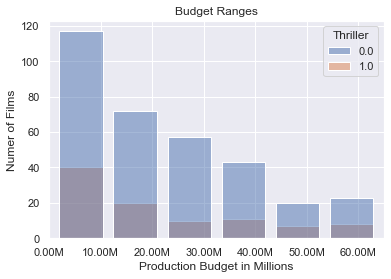

In [425]:
ax7 = sns.histplot(df_budget_genres, x="production_budget",bins=6,shrink=.8,hue='Thriller')
ax7.set(xlabel = 'Production Budget in Millions', ylabel='Numer of Films', title='Budget Ranges')
#Turn Off Scientific Notationplt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#ax6.xaxis.get_major_formatter().set_scientific(False)
ax7.set(xlim = (0,65000000))
# fixing xticks warning with matplotlib.ticker "FixedLocator"
ticks_loc = ax7.get_xticks().tolist()
ax7.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax7.set_xticklabels(['{:,.2f}'.format(x/1000000) + 'M' for x in ticks_loc])

__Conclusion:__ Genres to

### Question: When should we most optimally release our movies? Are there better months for our releases?

In answering the question When to Release the movie lets look to see when previous movies were released.
Lets make a column for release month.


In [1255]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi,Comedy
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.strftime('%b')
#df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.month

In [430]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Family,Crime,Comedy,Biography,Drama,Documentary,History,War,Musical,release_month
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oct
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Feb
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oct
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oct
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Dec


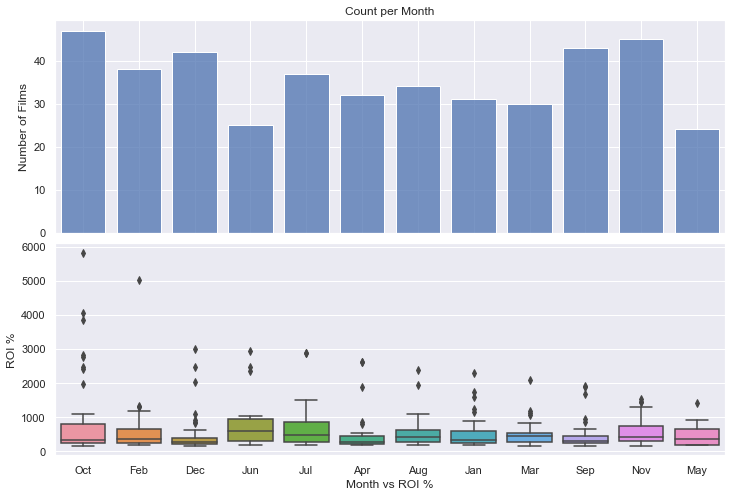

In [458]:
##Histplot of movies release in month
sns.set(style="darkgrid") 
fig, (ax1, ax2) = plt.subplots(figsize=(12,8),nrows =2, ncols=1,sharex=True ,sharey=False)
ax1 = sns.histplot(df_budget_genres, x="release_month",bins=12,shrink=.8, ax=ax1)
ax1.set(xlabel = 'Month of Film Release', ylabel='Number of Films', title='Count per Month')

sns.boxplot(x='release_month',y='roi_percent',data=df_budget_genres,ax=ax2,)
ax2.set(xlabel = 'Month vs ROI %', ylabel='ROI %', )
plt.subplots_adjust(wspace=0.8, hspace=0.05)
plt.show();


__Conclusion:__  Some very good returns on investment occurred in the months of October and December.  The average returns per month are similar and all under the 10 times investment.  There is a down trend with September and May not having huge gains.  October could be closely related with Halloween and Horror and/or Thriler movies.  

### Question: How many feature films should we release per year? ie drives initial investment

#How many movies a year?  Look at the successful studios number a year.
df_bom has studio info...Can join on budget genres to get month and year.  Not necessary can count studio and year 


In [1288]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [1293]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 543
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 429 non-null    int64  
 1   release_date       429 non-null    object 
 2   movie              429 non-null    object 
 3   production_budget  429 non-null    float64
 4   domestic_gross     429 non-null    float64
 5   worldwide_gross    429 non-null    float64
 6   profit_over_pb     429 non-null    float64
 7   roi_percent        429 non-null    float64
 8   x_times_invest     429 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         429 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
 14  Crime              429 non-null    float64
 15  Biography          429 non-null    float64
 16  Musical            429 non

In [1295]:
df_studios_bud_genres = pd.merge(df_budget_genres, df_bom, 
                            left_on=  ['movie',pd.to_datetime(df_budget_genres['release_date']).dt.year],
                            right_on= ['title','year'], 
                            how = 'left')

In [1302]:
df_studios_bud_genres[df_studios_bud_genres.studio.isna()]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Fantasy,Sport,Sci-Fi,Comedy,release_month,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
13,43,"Jun 6, 2014",The Fault in Our Stars,12000000.0,124872350.0,307166834.0,295166834.0,2459.7,25.6,The Fault in Our Stars,...,0.0,0.0,0.0,0.0,Jun,NaN,NaN,NaN,2014,NaN
14,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,254900667.0,244900667.0,2449.0,25.5,Halloween,...,0.0,0.0,0.0,0.0,Oct,NaN,NaN,NaN,2018,NaN
42,88,"Mar 22, 2019",Us,20000000.0,175006930.0,254210310.0,234210310.0,1171.1,12.7,Us,...,0.0,0.0,0.0,0.0,Mar,NaN,NaN,NaN,2019,NaN
46,100,"Jan 18, 2019",Glass,20000000.0,111035005.0,245303505.0,225303505.0,1126.5,12.3,Glass,...,0.0,0.0,1.0,0.0,Jan,NaN,NaN,NaN,2019,NaN
47,90,"Mar 16, 2018",I Can Only Imagine,7000000.0,83482352.0,85604221.0,78604221.0,1122.9,12.2,I Can Only Imagine,...,0.0,0.0,0.0,0.0,Mar,NaN,NaN,NaN,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,71,"May 31, 2019",Rocketman,41000000.0,57342725.0,108642725.0,67642725.0,165.0,2.6,Rocketman,...,0.0,0.0,0.0,0.0,May,NaN,NaN,NaN,2019,NaN
406,39,"Oct 14, 2011",Footloose,24000000.0,51802742.0,62989834.0,38989834.0,162.5,2.6,Footloose,...,0.0,0.0,0.0,1.0,Oct,NaN,NaN,NaN,2011,NaN
412,37,"Jan 22, 2010",Legion,26000000.0,40168080.0,67647574.0,41647574.0,160.2,2.6,Legion,...,1.0,0.0,0.0,0.0,Jan,NaN,NaN,NaN,2010,NaN
415,99,"Feb 27, 2015",Focus,65000000.0,53862963.0,168065700.0,103065700.0,158.6,2.6,Focus,...,0.0,0.0,0.0,1.0,Feb,NaN,NaN,NaN,2015,NaN


In [1310]:
df_bom[df_bom.index== 'Get Out']

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Get Out,Uni.,176000000.0,79400000.0,2017,255400000.0


In [1312]:
df_studios_bud_genres = df_studios_bud_genres[df_studios_bud_genres.studio.notna()]

In [1315]:
#a set of distinct genres in the df
all_studios = set(df_studios_bud_genres['studio'])

In [1317]:
all_studios

41

In [ ]:
#getting a dict with Studio counts
studio_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [1320]:
df_studios_bud_genres['studio'].value_counts()

Uni.        56
Fox         29
Sony        25
Par.        25
WB          21
WB (NL)     20
Wein.       19
LGF         18
FoxS        15
Focus       14
SGem        14
LG/S        11
BV          11
TriS        10
ORF         10
SPC          9
Rela.        8
STX          7
A24          6
CBS          5
Sum.         4
RAtt.        4
Eros         3
BH Tilt      3
W/Dim.       3
Affirm       2
IFC          2
EC           1
3D           1
BG           1
Orch.        1
PFR          1
LGP          1
UTV          1
Yash         1
RTWC         1
Over.        1
Neon         1
GrtIndia     1
Mira.        1
MGM          1
Name: studio, dtype: int64

In [1321]:
studio_count = dict(df_studios_bud_genres['studio'].value_counts())

In [1322]:
studio_count

{'Uni.': 56,
 'Fox': 29,
 'Sony': 25,
 'Par.': 25,
 'WB': 21,
 'WB (NL)': 20,
 'Wein.': 19,
 'LGF': 18,
 'FoxS': 15,
 'Focus': 14,
 'SGem': 14,
 'LG/S': 11,
 'BV': 11,
 'TriS': 10,
 'ORF': 10,
 'SPC': 9,
 'Rela.': 8,
 'STX': 7,
 'A24': 6,
 'CBS': 5,
 'Sum.': 4,
 'RAtt.': 4,
 'Eros': 3,
 'BH Tilt': 3,
 'W/Dim.': 3,
 'Affirm': 2,
 'IFC': 2,
 'EC': 1,
 '3D': 1,
 'BG': 1,
 'Orch.': 1,
 'PFR': 1,
 'LGP': 1,
 'UTV': 1,
 'Yash': 1,
 'RTWC': 1,
 'Over.': 1,
 'Neon': 1,
 'GrtIndia': 1,
 'Mira.': 1,
 'MGM': 1}

In [1376]:
df_bom_studio = df_bom.groupby(by=['studio','year']).count()

In [1377]:
df_bom_studio

domestic_gross  foreign_gross  worldwide_gross
studio year                                                
0      2010               1              1                1
       2011               1              1                1
       2012               1              1                1
       2014               1              1                1
       2017               1              1                1
...                     ...            ...              ...
Zeit.  2013               2              2                2
       2014               4              4                4
       2015               1              1                1
       2016               1              1                1
       2017               1              1                1

[747 rows x 3 columns]

In [1501]:
df_bom_studio_pivott = df_bom.pivot_table(index='studio' ,values='worldwide_gross',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [1504]:

df_bom_studio_pivott.sort_values(['count'], ascending=[False], inplace=True)
df_bom_studio_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,328,399,400,350,395,450,436,321,308,3387
IFC,22,33,22,17,18,21,16,9,8,166
Uni.,15,15,16,16,14,21,15,14,21,147
WB,19,17,15,11,18,18,12,13,17,140
Magn.,16,21,23,10,19,15,17,9,6,136
...,...,...,...,...,...,...,...,...,...,...
TAFC,0,0,0,0,0,1,0,0,0,1
Argo.,0,1,0,0,0,0,0,0,0,1
WOW,1,0,0,0,0,0,0,0,0,1


In [1373]:
type(df_bom_studio)

pandas.core.frame.DataFrame

In [1510]:
testpiv = df_bom_studio_pivott[1:21]

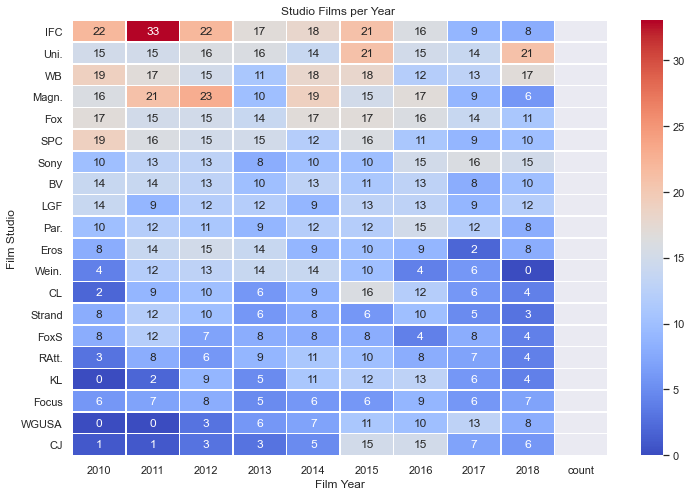

In [1526]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax9 = plt.subplots(figsize=(12, 8))

ax9 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=testpiv, ax=ax9, cmap='coolwarm',mask=mask)
ax9.set(xlabel = 'Film Year', ylabel='Film Studio', title='Studio Films per Year ')
plt.show()



### 

In [ ]:
Top 20 studios for total movies

In [1529]:
# of the Successful movies number per year
#df_studios_bud_genres['studio'].value_counts())
df_studio_budget_pivott = df_studios_bud_genres.pivot_table(index='studio' ,values='worldwide_gross_x',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [1531]:
df_studio_budget_pivott.sort_values(['count'], ascending=[False], inplace=True)

In [1532]:
df_studio_budget_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,37,42,41,39,45,45,50,35,34,368
Uni.,2,6,4,6,8,9,8,6,7,56
Fox,5,4,3,3,4,2,4,2,2,29
Sony,4,2,3,2,3,2,3,3,3,25
Par.,3,4,5,1,1,3,4,2,2,25
WB,3,2,4,0,3,4,2,1,2,21
WB (NL),1,3,0,2,3,2,5,2,2,20
Wein.,1,4,2,2,5,4,1,0,0,19
LGF,1,0,1,0,2,1,6,3,4,18


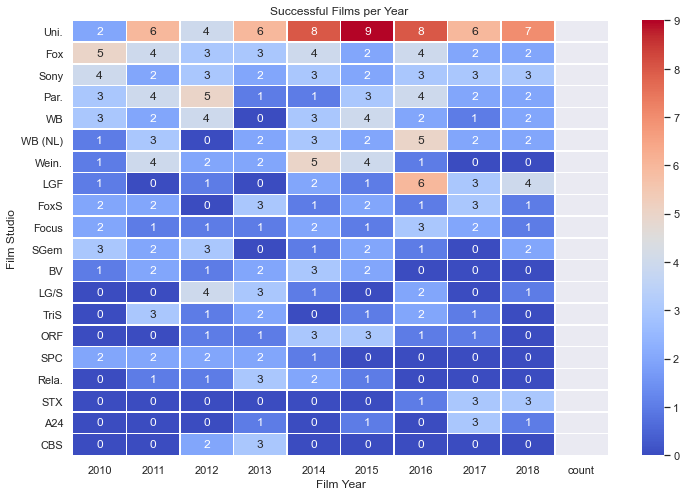

In [1538]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax10 = plt.subplots(figsize=(12, 8))

ax10 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=df_studio_budget_pivott[1:21], ax=ax10, cmap='coolwarm',mask=mask)
ax10.set(xlabel = 'Film Year', ylabel='Film Studio', title='Successful Films per Year ')
plt.show()

In [1769]:
df_studio_budget_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,37,42,41,39,45,45,50,35,34,368
Uni.,2,6,4,6,8,9,8,6,7,56
Fox,5,4,3,3,4,2,4,2,2,29
Sony,4,2,3,2,3,2,3,3,3,25
Par.,3,4,5,1,1,3,4,2,2,25
WB,3,2,4,0,3,4,2,1,2,21
WB (NL),1,3,0,2,3,2,5,2,2,20
Wein.,1,4,2,2,5,4,1,0,0,19
LGF,1,0,1,0,2,1,6,3,4,18


In [1579]:
df_studio_genre_count_pivott

Horror      0.0                                     1.0                      \
Thriller    0.0                     1.0             0.0                 1.0   
Mystery     0.0         1.0         0.0     1.0     0.0         1.0     0.0   
Sci-Fi      0.0     1.0 0.0     1.0 0.0 1.0 0.0 1.0 0.0     1.0 0.0 1.0 0.0   
Fantasy     0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0   
studio year                                                                   
3D     2010   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
A24    2013   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2015   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2017   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2018   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
...          ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
Wein.  2013   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2014   3   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2015   3   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2016   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Yash   2016   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Horror               
Thriller             
Mystery         1.0  
Sci-Fi      1.0 0.0  
Fantasy     0.0 0.0  
studio year          
3D     2010   0   0  
A24    2013   0   0  
       2015   0   0  
       2017   0   0  
       2018   0   0  
...          ..  ..  
Wein.  2013   0   0  
       2014   0   0  
       2015   0   0  
       2016   0   0  
Yash   2016   0   0  

[163 rows x 18 columns]

In [1580]:
df_studios_bud_genres

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Fantasy,Sport,Sci-Fi,Comedy,release_month,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,Oct,Par.,84800000.0,92800000.0,2010,177600000.0
1,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,Feb,Uni.,176000000.0,79400000.0,2017,255400000.0
2,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,Oct,Par.,104000000.0,103000000.0,2011,207000000.0
3,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,Oct,WB (NL),84300000.0,172800000.0,2014,257100000.0
4,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,Dec,UTV,12400000.0,290500000.0,2016,302900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,...,0.0,0.0,1.0,0.0,Mar,Uni.,62500000.0,65400000.0,2011,127900000.0
425,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,...,0.0,0.0,1.0,1.0,Mar,Uni.,37400000.0,60600000.0,2011,98000000.0
426,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,...,0.0,1.0,0.0,0.0,Dec,Uni.,115600000.0,47800000.0,2014,163400000.0
427,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,...,0.0,0.0,0.0,1.0,Dec,SPC,3200000.0,16500000.0,2010,19700000.0


In [1777]:
df_studio_genre_count_group = df_studios_bud_genres.groupby(by=['studio','year']).sum()

In [1774]:
df_studio_genre_count_group

id  release_date  movie  production_budget  domestic_gross_x  \
studio year                                                                 
3D     2010   1             1      1                  1                 1   
A24    2013   1             1      1                  1                 1   
       2015   1             1      1                  1                 1   
       2017   3             3      3                  3                 3   
       2018   1             1      1                  1                 1   
...          ..           ...    ...                ...               ...   
Wein.  2013   2             2      2                  2                 2   
       2014   5             5      5                  5                 5   
       2015   4             4      4                  4                 4   
       2016   1             1      1                  1                 1   
Yash   2016   1             1      1                  1                 1   

             worldwide_gross_x  profit_over_pb  roi_percent  x_times_invest  \
studio year                                                                   
3D     2010                  1               1            1               1   
A24    2013                  1               1            1               1   
       2015                  1               1            1               1   
       2017                  3               3            3               3   
       2018                  1               1            1               1   
...                        ...             ...          ...             ...   
Wein.  2013                  2               2            2               2   
       2014                  5               5            5               5   
       2015                  4               4            4               4   
       2016                  1               1            1               1   
Yash   2016                  1               1            1               1   

             primary_title  ...  Music  History  Fantasy  Sport  Sci-Fi  \
studio year                 ...                                           
3D     2010              1  ...      1        1        1      1       1   
A24    2013              1  ...      1        1        1      1       1   
       2015              1  ...      1        1        1      1       1   
       2017              3  ...      3        3        3      3       3   
       2018              1  ...      1        1        1      1       1   
...                    ...  ...    ...      ...      ...    ...     ...   
Wein.  2013              2  ...      2        2        2      2       2   
       2014              5  ...      5        5        5      5       5   
       2015              4  ...      4        4        4      4       4   
       2016              1  ...      1        1        1      1       1   
Yash   2016              1  ...      1        1        1      1       1   

             Comedy  release_month  domestic_gross_y  foreign_gross  \
studio year                                                           
3D     2010       1              1                 1              1   
A24    2013       1              1                 1              1   
       2015       1              1                 1              1   
       2017       3              3                 3              3   
       2018       1              1                 1              1   
...             ...            ...               ...            ...   
Wein.  2013       2              2                 2              2   
       2014       5              5                 5              5   
       2015       4              4                 4              4   
       2016       1              1                 1              1   
Yash   2016       1              1                 1              1   

             worldwide_gross_y  
studio year                     
3D     2010      

In [1778]:
df_studio_genre_count_group.drop(columns=['domestic_gross_x','runtime_minutes',
                                 'domestic_gross_y',
                                 'foreign_gross','worldwide_gross_y',
                                'production_budget','worldwide_gross_x',
                                'id','profit_over_pb','roi_percent','x_times_invest',
                                 'start_year'],inplace=True)

In [1602]:
df_studio_genre_count_group.drop(columns=['domestic_gross_x','runtime_minutes',
                                 'domestic_gross_y',
                                 'foreign_gross','worldwide_gross_y',
                                'production_budget','worldwide_gross_x',
                                'id','profit_over_pb','roi_percent','x_times_invest',
                                 'start_year'],inplace=True)

In [1779]:
df_studio_genre_count_group

Crime  Biography  Musical  Thriller  Drama  Action  Mystery  \
studio year                                                                
3D     2010    0.0        0.0      0.0       0.0    0.0     0.0      0.0   
A24    2013    0.0        0.0      0.0       0.0    1.0     0.0      0.0   
       2015    0.0        0.0      0.0       1.0    1.0     0.0      0.0   
       2017    0.0        1.0      0.0       0.0    3.0     0.0      0.0   
       2018    0.0        0.0      0.0       0.0    1.0     0.0      1.0   
...            ...        ...      ...       ...    ...     ...      ...   
Wein.  2013    0.0        2.0      0.0       0.0    2.0     0.0      0.0   
       2014    1.0        2.0      0.0       1.0    4.0     0.0      0.0   
       2015    0.0        1.0      0.0       1.0    3.0     1.0      0.0   
       2016    0.0        1.0      0.0       0.0    1.0     0.0      0.0   
Yash   2016    0.0        0.0      0.0       0.0    1.0     1.0      0.0   

             Western  War  Documentary  ...  Adventure  Animation  Romance  \
studio year                             ...                                  
3D     2010      0.0  0.0          1.0  ...        0.0        0.0      0.0   
A24    2013      0.0  0.0          0.0  ...        0.0        0.0      1.0   
       2015      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2017      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2018      0.0  0.0          0.0  ...        0.0        0.0      0.0   
...              ...  ...          ...  ...        ...        ...      ...   
Wein.  2013      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2014      0.0  0.0          1.0  ...        0.0        0.0      1.0   
       2015      0.0  0.0          0.0  ...        0.0        0.0      1.0   
       2016      0.0  0.0          0.0  ...        0.0        0.0      0.0   
Yash   2016      0.0  0.0          0.0  ...        0.0        0.0      0.0   

             Horror  Music  History  Fantasy  Sport  Sci-Fi  Comedy  
studio year                                                          
3D     2010     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
A24    2013     0.0    0.0      0.0      0.0    0.0     0.0     1.0  
       2015     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
       2017     0.0    0.0      0.0      0.0    0.0     0.0     2.0  
       2018     1.0    0.0      0.0      0.0    0.0     0.0     0.0  
...             ...    ...      ...      ...    ...     ...     ...  
Wein.  2013     0.0    0.0      0.0      0.0    0.0     0.0     1.0  
       2014     0.0    0.0      0.0      0.0    0.0     1.0     1.0  
       2015     0.0    0.0      1.0      0.0    1.0     0.0     0.0  
       2016     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
Yash   2016     0.0    0.0      0.0      0.0    1.0     0.0     0.0  

[163 rows x 21 columns]

In [1797]:
df_studio_genre_count_group.unstack()






Crime                                         Biography  ... Sci-Fi  \
year      2010 2011 2012 2013 2014 2015 2016 2017 2018      2010  ...   2018   
studio                                                            ...          
3D         0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
A24        NaN  NaN  NaN  0.0  NaN  0.0  NaN  0.0  0.0       NaN  ...    0.0   
Affirm     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0       NaN  ...    0.0   
BG         NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
BH Tilt    NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0       NaN  ...    1.0   
BV         0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN       0.0  ...    NaN   
CBS        NaN  NaN  0.0  0.0  NaN  NaN  NaN  NaN  NaN       NaN  ...    NaN   
EC         NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN       NaN  ...    NaN   
Eros       NaN  NaN  0.0  0.0  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
Focus      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0       0.0  ...    0.0   
Fox        2.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0       0.0  ...    0.0   
FoxS       0.0  0.0  NaN  0.0  1.0  0.0  0.0  1.0  0.0       1.0  ...    0.0   
GrtIndia   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN       NaN  ...    NaN   
IFC        NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN       NaN  ...    NaN   
LG/S       NaN  NaN  0.0  0.0  1.0  NaN  0.0  NaN  0.0       NaN  ...    0.0   
LGF        0.0  NaN  0.0  NaN  0.0  1.0  2.0  1.0  1.0       0.0  ...    0.0   
LGP        NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
MGM        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0       NaN  ...    0.0   
Mira.      0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
Neon       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN       NaN  ...    NaN   
ORF        NaN  NaN  1.0  0.0  1.0  2.0  0.0  0.0  NaN       NaN  ...    NaN   
Orch.      NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   
Over.      0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
PFR        NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
Par.       0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0       1.0  ...    1.0   
RAtt.      0.0  0.0  0.0  NaN  NaN  NaN  0.0  NaN  NaN       0.0  ...    NaN   
RTWC       NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN       NaN  ...    NaN   
Rela.      NaN  0.0  0.0  0.0  1.0  0.0  NaN  NaN  NaN       NaN  ...    NaN   
SGem       0.0  0.0  0.0  NaN  0.0  1.0  1.0  NaN  0.0       0.0  ...    0.0   
SPC        1.0  1.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN       0.0  ...    NaN   
STX        NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0       NaN  ...    0.0   
Sony       0.0  0.0  1.0  1.0  2.0  1.0  0.0  0.0  0.0       1.0  ...    0.0   
Sum.       0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
TriS       NaN  0.0  1.0  1.0  NaN  0.0  1.0  1.0  NaN       NaN  ...    NaN   
UTV        NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   
Uni.       0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0       0.0  ...    1.0   
W/Dim.     0.0  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
WB         1.0  0.0  0.0  NaN  1.0  1.0  1.0  0.0  1.0       0.0  ...    0.0   
WB (NL)    0.0  1.0  NaN  1.0  0.0  0.0  1.0  0.0  1.0       0.0  ...    0.0   
Wein.      0.0  0.0  1.0  0.0  1.0  0.0  0.0  NaN  NaN       1.0  ...    NaN   
Yash       NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   

         Comedy                                          
year       2010 2011 2012 2013 2014 2015 2016 2017 2018  
studio                                                   
3D          0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
A24         NaN  NaN  NaN  1.0  NaN  0.0  NaN  2.0  0.0  
Affirm      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  
BG          NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  
BH Tilt     NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0  
BV          0.0  1.0  0.

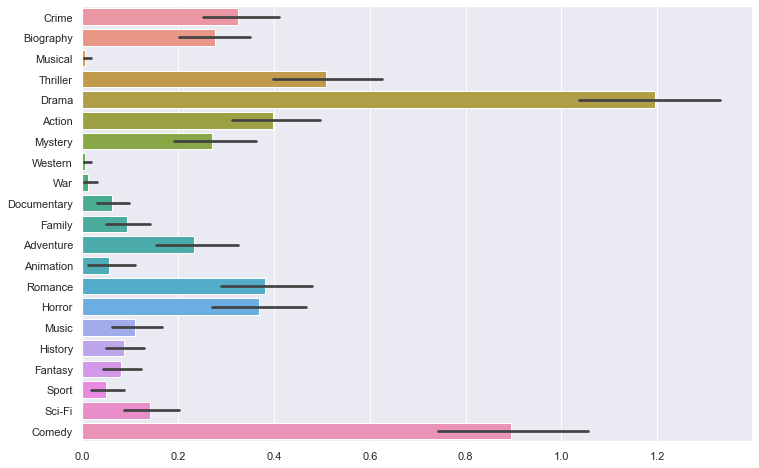

In [1798]:
# use Seaborn styles
sns.set()
fig, ax11 = plt.subplots(figsize=(12, 8))

ax11 = sns.barplot(data=df_studio_genre_count_group, orient='h')
#ax11.set(xlabel = 'Film Year', ylabel='Film Studio', title='Num Thrillers per Year by Studio ')
plt.show()

In [1620]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

In [1621]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [1572]:
#Pivot not giving results im an needing.
#Will create interative
studio_genre_count = dict(df_studios_bud_genres['studio'].value_counts())

In [1573]:
studio_genre_count

{'Uni.': 56,
 'Fox': 29,
 'Sony': 25,
 'Par.': 25,
 'WB': 21,
 'WB (NL)': 20,
 'Wein.': 19,
 'LGF': 18,
 'FoxS': 15,
 'Focus': 14,
 'SGem': 14,
 'LG/S': 11,
 'BV': 11,
 'TriS': 10,
 'ORF': 10,
 'SPC': 9,
 'Rela.': 8,
 'STX': 7,
 'A24': 6,
 'CBS': 5,
 'Sum.': 4,
 'RAtt.': 4,
 'Eros': 3,
 'BH Tilt': 3,
 'W/Dim.': 3,
 'Affirm': 2,
 'IFC': 2,
 'EC': 1,
 '3D': 1,
 'BG': 1,
 'Orch.': 1,
 'PFR': 1,
 'LGP': 1,
 'UTV': 1,
 'Yash': 1,
 'RTWC': 1,
 'Over.': 1,
 'Neon': 1,
 'GrtIndia': 1,
 'Mira.': 1,
 'MGM': 1}